In [24]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns


#I liked the style from the assignment
plt.style.use('bmh')
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from pandas import DataFrame

In [25]:
# Load your data into a DataFrame
data = pd.read_csv('DataTableToRegress.csv')
# print(data)
features = ['Al', 'Cu','Fe','Mn','Ni','Ti','V', 'Cr','Mo', 'Nb']

In [45]:
# Assume 'target_column' is the name of your target variable
X = data[features]  # Features
ylog = data['Acceptable']  # Target variable
ylin = data['Tot Vol Frac Other']
# print(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, ylin, test_size=0.2, random_state=42)


In [28]:
# Initialize the logistic regression model
linreg = LinearRegression()

# Fit the model using the training data
linreg.fit(X_train, y_train)


LinearRegression()

In [29]:
# Make predictions on the test set
y_pred = linreg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.19764635868799493


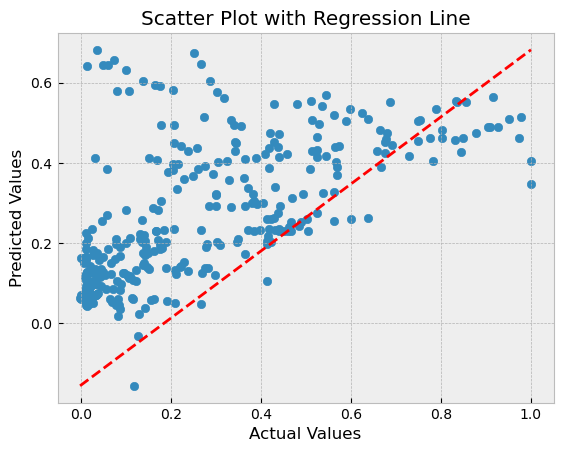

In [30]:
# Scatter Plot with Regression Line
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot with Regression Line')
plt.show()

Certainly! The Scatter Plot with Regression Line is a visualization that helps us understand the relationship between the actual target values (`y_test`) and the predicted values (`y_pred`) from our linear regression model.

- **Dots (Scatter Plot)**: Each dot in the plot represents a data point. The x-coordinate of the dot corresponds to the actual value (`y_test`), and the y-coordinate corresponds to the predicted value (`y_pred`) for that data point.

- **Red Dashed Line (Regression Line)**: The red dashed line represents the ideal scenario where the predicted values perfectly match the actual values. This line is formed by connecting the minimum and maximum actual values to their respective predicted values. It's a visual representation of a perfect prediction.

Interpretation:
- Points **above** the red dashed line indicate that the model **underpredicted** those instances. In other words, the predicted values (`y_pred`) are less than the actual values (`y_test`).
  
- Points **below** the red dashed line indicate that the model **overpredicted** those instances. In other words, the predicted values (`y_pred`) are greater than the actual values (`y_test`).

Ideally, we would want all the points to be on or very close to the red dashed line, indicating a strong linear relationship and accurate predictions. If the points are scattered far from the line, it suggests that our model may not be accurately capturing the underlying relationship in the data.

The Scatter Plot with Regression Line helps in visually assessing how well our model has predicted the target variable and the overall accuracy of the predictions.

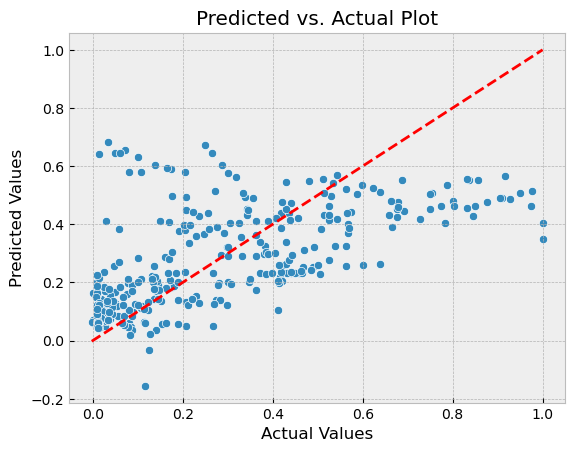

In [18]:
# Predicted vs. Actual Plot
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Plot')
plt.show()

The two code snippets produce plots that are related but convey slightly different information:

1. **Scatter Plot with Regression Line**:
   - The scatter plot displays the actual data points, where the x-axis represents the actual values (`y_test`) and the y-axis represents the predicted values (`y_pred`).
   - The red dashed line represents the regression line, where the slope and intercept are based on the predicted values (`y_pred`). This line shows the general trend of the predicted values.

2. **Predicted vs. Actual Plot**:
   - The scatter plot also displays the actual versus predicted values, but it utilizes Seaborn's `scatterplot` function for plotting.
   - The red dashed line represents the perfect correlation line, where each point would lie if the predicted values perfectly matched the actual values. It's a line with a slope of 1.

In summary:
- The first plot explicitly emphasizes the regression line, showcasing how the predicted values relate to the actual values and how the model approximates this relationship.
- The second plot emphasizes the perfect correlation line, highlighting how well the predicted values match the actual values in an ideal scenario.

Both plots provide insights into the model's predictive performance and how well it aligns with the actual data, but they emphasize different aspects of the relationship between actual and predicted values. The choice between them depends on what you want to emphasize and communicate to your audience.

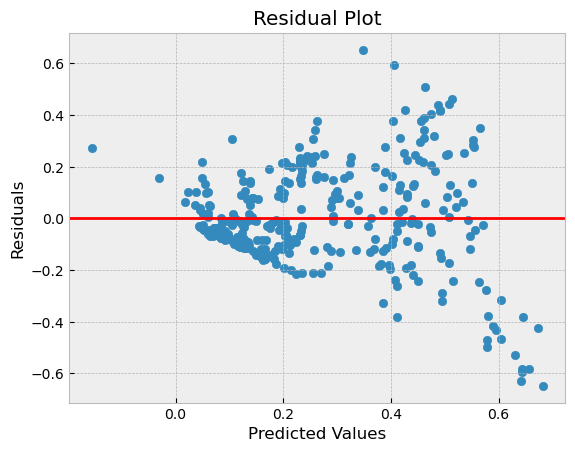

In [16]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Certainly! The Residual Plot is a visualization that helps us understand the distribution and pattern of residuals, which are the differences between the actual target values (`y_test`) and the predicted values (`y_pred`) from our linear regression model.

- **Dots (Scatter Plot)**: Each dot in the plot represents a data point. The x-coordinate of the dot corresponds to the predicted value (`y_pred`), and the y-coordinate corresponds to the residual for that data point, calculated as `residual = actual value - predicted value`.

- **Red Solid Line (Horizontal Line)**: The red solid line is at y=0, indicating zero residual. This line represents the perfect prediction scenario where the residuals are exactly zero for all data points.

Interpretation:
- Points **above** the red solid line have positive residuals, indicating that the model **underpredicted** those instances. In other words, the predicted values (`y_pred`) are less than the actual values (`y_test`).

- Points **below** the red solid line have negative residuals, indicating that the model **overpredicted** those instances. In other words, the predicted values (`y_pred`) are greater than the actual values (`y_test`).

- The spread and pattern of the residuals give insights into the model's performance. Ideally, we want the residuals to be randomly scattered around the red line, indicating that the model's errors are not biased and follow a normal distribution.

- If there's a clear pattern or structure in the residuals (e.g., a curve or an increasing/decreasing trend), it suggests that the model may not be capturing all the relevant features of the data.

The Residual Plot helps in assessing the assumptions of homoscedasticity (constant variance of residuals) and identifying any patterns or outliers in the residuals, which are important for evaluating the model's performance.

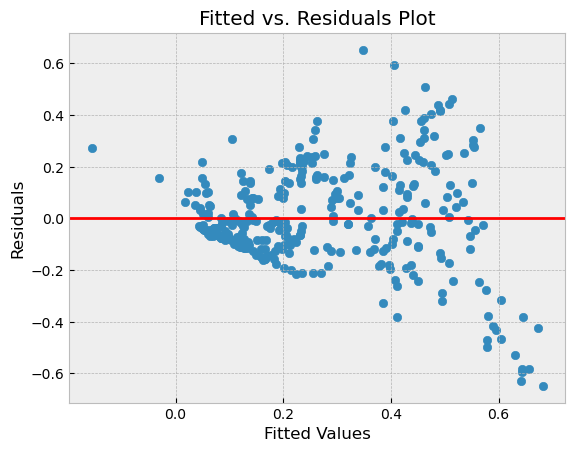

In [34]:
# Fitted vs. Residuals Plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs. Residuals Plot')
plt.show()

Same plot as earlier

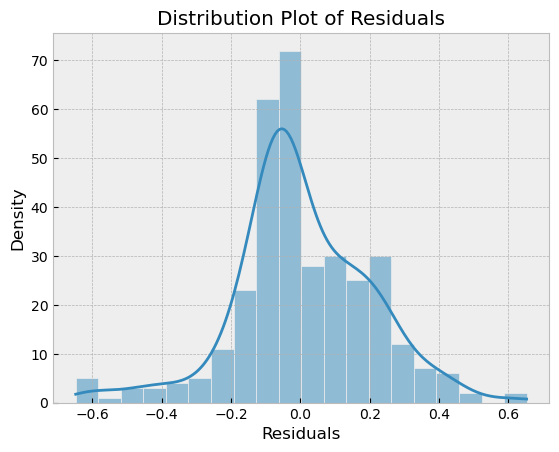

In [17]:
# Distribution Plot of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution Plot of Residuals')
plt.show()

Absolutely! The histogram of residuals, along with a density plot (KDE - Kernel Density Estimate), provides insights into the distribution and characteristics of the residuals in a linear regression model.

- **Histogram**: The histogram displays the frequency (or count) of residuals falling within specific bins. Each bin represents a range of residual values, and the height of the bar corresponds to the number of residuals falling within that range.

- **Density Plot (KDE)**: The density plot is a smoothed representation of the distribution of residuals, giving us an idea of the shape and central tendency of the residuals.

Interpretation:
- **Normal Distribution**: A histogram that approximates a bell-shaped curve and is centered around zero suggests that the residuals are normally distributed. A normal distribution is often a desirable characteristic as it implies that the errors made by the model follow a symmetric and consistent pattern.

- **Centered around Zero**: Having the distribution centered around zero indicates that, on average, the model is making predictions that are reasonably accurate. Ideally, the residuals should have a mean (average) close to zero, implying that, on average, the model is neither consistently underpredicting nor overpredicting.

- **Skewness**: If the histogram is skewed to the left or right, it suggests that the residuals have a bias towards lower or higher values, respectively. A skew towards the right means the model is tending to overpredict, and a skew towards the left indicates underprediction.

- **Spread (Width)**: The width of the histogram gives an indication of the variability of residuals. A wider spread implies a larger range of errors, while a narrow spread suggests a more consistent performance.

In summary, a histogram of residuals resembling a normal distribution centered around zero is generally a good sign. However, it's important to consider other aspects of the residuals (e.g., homoscedasticity, absence of patterns) alongside the distribution to comprehensively evaluate the model's performance.

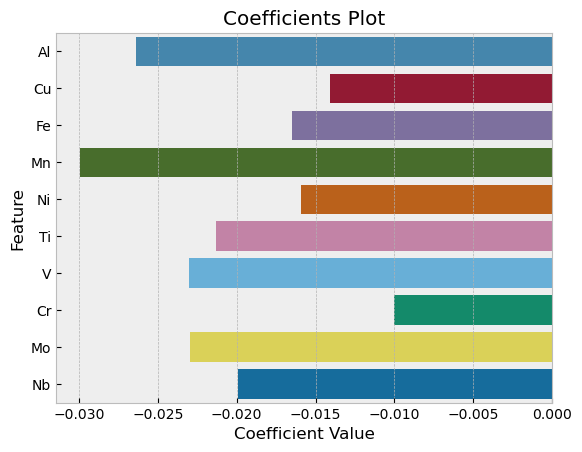

In [20]:
# Coefficients Plot
coef_names = X.columns  # Assuming X contains the features
coef_values = linreg.coef_
sns.barplot(x=coef_values, y=coef_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients Plot')
plt.show()

The provided code generates a "Coefficients Plot" or a "Feature Importance Plot" for a linear regression model. In this plot, the x-axis represents the coefficient values of the features, and the y-axis represents the features (or variables).

- **X-axis (Coefficient Value)**: The x-axis shows the coefficient values corresponding to each feature. The coefficients are obtained from the linear regression model and represent the weight or importance assigned to each feature in the model.

- **Y-axis (Feature)**: The y-axis lists the names of the features.

In a linear regression model, the coefficient values indicate the effect or impact of each feature on the predicted target variable (y). The sign (positive or negative) of the coefficient indicates the direction and magnitude of the effect:

- **Positive Coefficient**: A positive coefficient value indicates that as the corresponding feature increases, the predicted target variable (y) is also expected to increase.

- **Negative Coefficient**: A negative coefficient value indicates that as the corresponding feature increases, the predicted target variable (y) is expected to decrease.

In the provided code, a bar plot is used to visualize the coefficient values for each feature. Each bar's position (to the left or right of the y-axis) and length (bar length) represent the coefficient value for the respective feature:

- **More Negative Values**: Features with more negative coefficient values have a stronger negative impact on the predicted target variable. This means that an increase in these features is associated with a decrease in the predicted target variable.

Understanding the coefficients and their signs is crucial for interpreting how each feature contributes to the model's predictions. It helps identify which features have a significant impact and in what direction. The plot allows you to visually compare the relative importance and direction of impact of each feature on the predicted target variable.

In [32]:
# # Partial Residuals Plot (for a specific feature)
# # Replace 'feature_of_interest' with the feature you want to visualize
# #features = ['Al', 'Cu','Fe','Mn','Ni','Ti','V', 'Cr','Mo', 'Nb']
# feature_of_interest = 'Mn'
# sns.residplot(x=X[feature_of_interest], y=residuals, lowess=True, line_kws={'color': 'red'})
# plt.xlabel(feature_of_interest)
# plt.ylabel('Residuals')
# plt.title('Partial Residuals Plot')
# plt.show()

Didn't work

In [35]:
# # Leverage-Residuals Plot
# # Note: Leverage calculation may vary based on the linear regression implementation used
# # Replace 'leverage_values' and 'normalized_residuals_squared' with appropriate values
# # leverage_values = ...
# # normalized_residuals_squared = ...
# plt.scatter(leverage_values, normalized_residuals_squared)
# plt.xlabel('Leverage')
# plt.ylabel('Normalized Residuals Squared')
# plt.title('Leverage-Residuals Plot')
# plt.show()

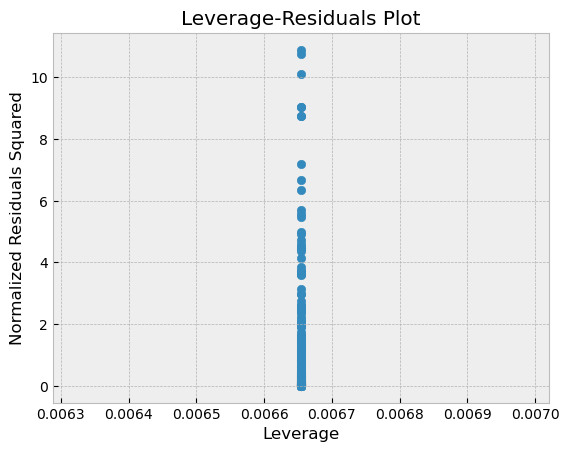

In [37]:
# Assuming y_pred contains the predicted values and y_test contains the actual target values
# residuals = y_test - y_pred (if residuals haven't been computed already)

# Calculate the leverage values
# In scikit-learn, leverage values for a linear regression model can be calculated using the leverage formula:
# leverage_values = p + 1 / n, where p is the number of predictors and n is the number of observations
# Replace p and n with the appropriate values from your dataset
p = len(linreg.coef_)  # Number of predictors
n = len(X)  # Number of observations
leverage_values = (p + 1) / n * np.ones_like(residuals)  # Adjusted leverage values

# Calculate the normalized residuals squared
# Assuming sigma_squared is the estimated error variance (can be obtained from the model or by other means)
# normalized_residuals_squared = (residuals / sqrt(sigma_squared))^2
# Replace sigma_squared with the appropriate value
sigma_squared = np.mean(residuals ** 2)  # Estimated error variance
normalized_residuals_squared = (residuals / np.sqrt(sigma_squared)) ** 2

# Plot the Leverage-Residuals Plot
plt.scatter(leverage_values, normalized_residuals_squared)
plt.xlabel('Leverage')
plt.ylabel('Normalized Residuals Squared')
plt.title('Leverage-Residuals Plot')
plt.show()


The Leverage-Residuals Plot is a tool to identify influential data points in a linear regression analysis. Here's how to interpret the plot:

1. **Leverage**:
   - The x-axis represents the leverage values for each data point. Leverage measures how much an observation potentially influences the estimation of the regression coefficients. High leverage points can have a strong impact on the regression line.

2. **Normalized Residuals Squared**:
   - The y-axis represents the normalized residuals squared. These are the residuals (the differences between the observed values and the predicted values from the regression model) normalized by the standard error. Squaring the normalized residuals helps emphasize extreme values.

3. **Interpretation**:
   - Points with high leverage and high normalized residuals squared are potentially influential observations.
   - Points far to the right (high leverage) indicate data points that have an unusually large influence on the regression model.
   - Points far above (high normalized residuals squared) suggest observations with large discrepancies between observed and predicted values.

4. **Dashed Horizontal Line (Reference Line)**:
   - Typically, a dashed horizontal line is drawn at a certain threshold for normalized residuals squared (often 2 or 3 times the mean). Points above this line are considered potential outliers.

5. **Dashed Vertical Line (Reference Line)**:
   - There is no dashed vertical line in the plot you've provided, but it could be added to indicate a threshold for leverage values.

In summary, the Leverage-Residuals Plot helps in identifying data points that may significantly influence the regression model, potentially indicating outliers or influential observations that could affect the estimation of the regression coefficients.

In [ ]:
# # Cook's Distance Plot
# # Replace 'cooks_distance_values' with appropriate values
# # cooks_distance_values = ...
# plt.stem(cooks_distance_values, markerfmt=",")
# plt.xlabel('Data Points')
# plt.ylabel("Cook's Distance")
# plt.title("Cook's Distance Plot")
# plt.show()

In [44]:
# n_samples = len(X)

# # Calculate hat matrix
# # Convert X to a NumPy array
# X_np = X.values

# # Calculate hat matrix
# hat_matrix = X_np @ np.linalg.inv(X_np.T @ X_np) @ X_np.T


# # Check residuals and hat_matrix
# print("Residuals length:", len(residuals))
# print("Hat matrix shape:", hat_matrix.shape)

# # Initialize Cook's distances array
# cooks_distance_values = np.zeros(n_samples)

# # Calculate Cook's Distance for each data point
# for i in range(n_samples):
#     # Check if residuals and hat_matrix have valid indices
#     if i >= len(residuals) or i >= hat_matrix.shape[0]:
#         print(f"Invalid index {i}, skipping...")
#         continue

#     residual_i = residuals[i]
#     hat_i = hat_matrix[i, i]

#     # Calculate Cook's Distance
#     cooks_distance_values[i] = (residual_i**2) * hat_i / (2 * n_predictors * residual_variance)

# # Plot Cook's Distance
# plt.stem(cooks_distance_values, markerfmt=",")
# plt.xlabel('Data Points')
# plt.ylabel("Cook's Distance")
# plt.title("Cook's Distance Plot")
# plt.show()


Didn;t work

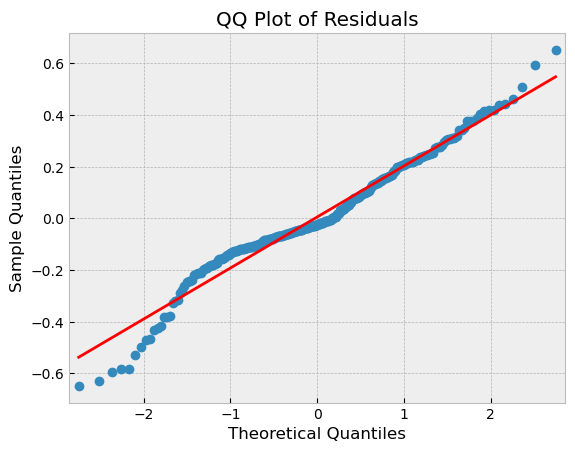

In [33]:
# QQ Plot of Residuals
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()